## 回归

根据因变量的不同，分成几种回归：  
* 连续：多重线性回归(注意与多元线性回归有区别，比如多元自变量是连续的，多重则可以是多种数据类型等)  
* 二项分布：logistic回归
* poisson分布：poisson回归
* 负二项分布：负二项回归

## 逻辑回归

同线性回归一样，需要求出$n$个参数：

$$
z=\theta_0+\theta_1x+\theta_2x+...+\theta_nx=\theta^Tx
$$

逻辑回归通过Sigmoid函数引入了非线性因素，可以轻松处理二分类问题:

$$
h_{\theta}(x)=g\left(\theta^{T} x\right), g(z)=\frac{1}{1+e^{-z}}
$$

与线性回归不同，逻辑回归使用的是交叉熵损失函数:

$$
J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m}\left(y^{(i)} \log h_{\theta}\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]\right.
$$

其梯度为:

$$
\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=0}^{m}\left(h_{\theta}-y^{i}\left(x^{i}\right)\right) x_{j}^{i}
$$

形式和线性回归一样，但其实假设函数(Hypothesis function)不一样，逻辑回归是:
$$
h_{\theta}(x)=\frac{1}{1+e^{-\theta^{T} x}}
$$

其推导如下:

$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=\frac{\partial}{\partial \theta_{j}}\left[-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]\right] \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)} \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right)-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)} \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right)\right] \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)}-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)}\right] \frac{\partial}{\partial \theta_{j}} h_{\theta}\left(x^{(i)}\right) \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \frac{1}{\left.h_{\theta}\left(x^{(i)}\right)\right)}-\left(1-y^{(i)}\right) \frac{1}{1-h_{\theta}\left(x^{(i)}\right)}\right] \frac{\partial}{\partial \theta_{j}} g\left(\theta^{T} x^{(i)}\right)
\end{aligned}
$$

因为:
$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} g\left(\theta^{T} x^{(i)}\right) &=\frac{\partial}{\partial \theta_{j}} \frac{1}{1+e^{-\theta^{T} x^{(i)}}} \\
&=\frac{e^{-\theta^{T} x^{(i)}}}{\left(1+^{-\theta} T^{T_{x}(i)}\right)^{2}} \frac{\partial}{\partial \theta_{j}} \theta^{T} x^{(i)} \\
&=g\left(\theta^{T} x^{(i)}\right)\left(1-g\left(\theta^{T} x^{(i)}\right)\right) x_{j}^{(i)}
\end{aligned}
$$
所以:
$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)}\left(1-g\left(\theta^{T} x^{(i)}\right)\right)-\left(1-y^{(i)}\right) g\left(\theta^{T} x^{(i)}\right)\right] x_{j}^{(i)} \\
&=-\frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-g\left(\theta^{T} x^{(i)}\right)\right) x_{j}^{(i)} \\
&=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
\end{aligned}
$$




In [1]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：/Users/johnjim/Desktop/machine-learning-toy-code


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

torch.Size([100, 1, 28, 28])
tensor([[9, 1, 6, 6, 7, 0, 8, 4, 2, 7],
        [6, 2, 8, 6, 0, 8, 4, 2, 4, 8],
        [9, 5, 4, 7, 0, 9, 5, 6, 2, 1],
        [9, 9, 8, 3, 7, 5, 4, 5, 5, 4],
        [3, 1, 4, 8, 7, 5, 3, 5, 9, 2],
        [3, 5, 0, 9, 8, 7, 5, 1, 9, 7],
        [6, 7, 0, 1, 2, 4, 6, 2, 5, 5],
        [3, 0, 2, 3, 8, 8, 5, 6, 1, 2],
        [2, 4, 1, 6, 1, 6, 9, 0, 4, 3],
        [9, 4, 2, 1, 2, 7, 6, 1, 5, 7]])
(302, 302, 3)


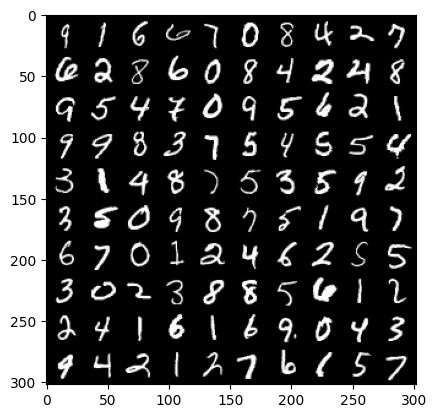

In [3]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(test_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print(labels.reshape(10,10))
print(img.shape)
plt.imshow(img)
plt.show()

In [4]:
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)

In [5]:
print(f"数据格式：{type(X_train)}，数据维度：{X_train.shape}")
print(f"数据格式：{type(y_train)}，数据维度：{y_train.shape}")

数据格式：<class 'numpy.ndarray'>，数据维度：(60000, 1, 28, 28)
数据格式：<class 'numpy.ndarray'>，数据维度：(60000,)


In [6]:
X_train = X_train.reshape(X_train.shape[0],784)

In [7]:
print(f"数据格式：{type(X_train)}，数据维度：{X_train.shape}")

数据格式：<class 'numpy.ndarray'>，数据维度：(60000, 784)


In [8]:
ones_col=[[1] for i in range(len(X_train))] # 生成全为1的二维嵌套列表，即[[1],[1],...,[1]]
X_train_modified=np.append(X_train,ones_col,axis=1)
x_train_modified_mat = np.mat(X_train_modified)
# Mnsit有0-9十个标记，由于是二分类任务，所以可以将标记0的作为1，其余为0用于识别是否为0的任务
y_train_modified=np.array([1 if y_train[i]==1 else 0 for i in range(len(y_train))])

theta = np.mat(np.zeros(len(X_train_modified[0])))
n_epochs=10 
lr = 0.01 # 学习率

def sigmoid(x):
    '''sigmoid函数
    '''
    return 1.0/(1+np.exp(-x))

In [13]:

for i_epoch in range(n_epochs):
    loss_epoch = 0
    for i in range(len(X_train_modified)):
        hypothesis = sigmoid(np.dot(X_train_modified[i], theta.T))
        error = y_train_modified[i]- hypothesis
        grad = error*x_train_modified_mat[i]
        theta += lr*grad
        loss_epoch+=error.item()
    # loss_epoch /= len(X_train_modified)
    print(f"回合数：{i_epoch+1}/{n_epochs}，损失：{loss_epoch}")

回合数：1/10，损失：1.5419329754839297
回合数：2/10，损失：1.472146817961555
回合数：3/10，损失：1.403348521579916
回合数：4/10，损失：1.3363512066208436
回合数：5/10，损失：1.2716899109420348
回合数：6/10，损失：1.2096970613688045
回合数：7/10，损失：1.150558375174322
回合数：8/10，损失：1.0943541489350312
回合数：9/10，损失：1.041089732601079
回合数：10/10，损失：0.990718018719414
